## Feature Extraction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('Price.csv')

In [2]:
#Renaming title of columns
df = df.rename(columns ={'कृषि उपज':'Name','ईकाइ':'Quantity','न्यूनतम':'Min','अधिकतम':'Max','औसत':'Avg'})

#Converting column containing nepali numbers into int
df['Avg']=df['Avg'].apply(lambda x: int(x))

In [3]:
#Converting date column to date
import datetime
df['cdate']=pd.to_datetime(df['cdate'])
print(df.dtypes)      #Data types of the columns in df

Name                 object
Quantity             object
Min                  object
Max                  object
Avg                   int64
cdate        datetime64[ns]
pricetype            object
dtype: object


In [4]:
df['Name'].value_counts()

काउली स्थानिय      1436
भुर्इ कटहर         1436
मूला सेतो(लोकल)    1436
केरा               1436
अदुवा              1436
                   ... 
अम्बा                44
सजिवन                32
अंगुर(कालो)          32
लीच्ची(भारतीय)       28
परवर(तराई)           16
Name: Name, Length: 120, dtype: int64

In [5]:
df.head(10)

,Name,Quantity,Min,Max,Avg,cdate,pricetype
0,गोलभेडा ठूलो(नेपाली),के.जी.,३०,३५,33,2018-02-25,W
1,गोलभेडा सानो,के.जी.,२५,३०,28,2018-02-25,W
2,अालु रातो,के.जी.,२०,२३,22,2018-02-25,W
3,अालु सेतो,के.जी.,१८,२०,19,2018-02-25,W
4,प्याज सुकेको भारतीय,के.जी.,४४,४६,45,2018-02-25,W
5,गाजर(लोकल),के.जी.,२५,३०,28,2018-02-25,W
6,बन्दा(लोकल),के.जी.,२२,२८,25,2018-02-25,W
7,काउली स्थानिय,के.जी.,२५,३०,28,2018-02-25,W
8,काउली तरार्इ,के.जी.,२०,२५,23,2018-02-25,W
9,मूला रातो,के.जी.,३०,३५,33,2018-02-25,W


### Adding two features: 
#### Price of yesterday and the day before yesterday

In [6]:
vegetable = set(df['Name'].values)      #Creating a set of vegetable i.e taking all the unique vegetables
len(vegetable)

feature_df = []                         # Empty list for future use

for v in vegetable:
    for p_type in ['W','R']:

        df_v = df[(df['Name'] == v) & (df['pricetype']== p_type)] #taking a vegetable of only one pricetype
        df_v = df_v.sort_values(by = ['cdate'], ascending = False) #sorting in descending order based on date. Recent date will be at first.

        if p_type == 'W':
            df_v['type'] = 1
        else:
            df_v['type'] = 0


        df_v['t_1'] = df_v.shift(-1)['Avg']
        df_v['t_2'] = df_v.shift(-2)['Avg']
#         df_v['t_7'] = df_v.shift(-7)['Avg']     #Could be a feature but data size decreases drastically

        feature_df.append(df_v)


In [7]:
feature_df = pd.concat(feature_df)

In [8]:
feature_df.dropna(inplace=True)
feature_df.tail()

,Name,Quantity,Min,Max,Avg,cdate,pricetype,type,t_1,t_2
63788,ठूलो गोलभेडा(भारतीय),केजी,१००,१२०,110,2019-07-01,R,0,115.0,115.0
63627,ठूलो गोलभेडा(भारतीय),केजी,११०,१२०,115,2019-06-30,R,0,115.0,115.0
63467,ठूलो गोलभेडा(भारतीय),केजी,११०,१२०,115,2019-06-29,R,0,115.0,115.0
63308,ठूलो गोलभेडा(भारतीय),केजी,११०,१२०,115,2019-06-28,R,0,115.0,115.0
63150,ठूलो गोलभेडा(भारतीय),केजी,११०,१२०,115,2019-06-27,R,0,115.0,105.0


In [9]:
#Making a copy of the dataframe to implement rolling mean
feature_df_edit=feature_df

In [10]:
feature_df_edit

,Name,Quantity,Min,Max,Avg,cdate,pricetype,type,t_1,t_2
76850,खुर्सानी हरियो(माछे),के जी,९५,१००,98,2019-09-26,W,1,98.0,98.0
76708,खुर्सानी हरियो(माछे),के जी,९५,१००,98,2019-09-25,W,1,98.0,65.0
76567,खुर्सानी हरियो(माछे),के जी,९५,१००,98,2019-09-24,W,1,65.0,62.0
76285,खुर्सानी हरियो(माछे),के जी,६०,७०,65,2019-09-22,W,1,62.0,58.0
75475,खुर्सानी हरियो(माछे),के जी,६०,६५,62,2019-09-16,W,1,58.0,58.0
...,...,...,...,...,...,...,...,...,...,...
63788,ठूलो गोलभेडा(भारतीय),केजी,१००,१२०,110,2019-07-01,R,0,115.0,115.0
63627,ठूलो गोलभेडा(भारतीय),केजी,११०,१२०,115,2019-06-30,R,0,115.0,115.0
63467,ठूलो गोलभेडा(भारतीय),केजी,११०,१२०,115,2019-06-29,R,0,115.0,115.0
63308,ठूलो गोलभेडा(भारतीय),केजी,११०,१२०,115,2019-06-28,R,0,115.0,115.0


In [11]:
feature_df_1=feature_df.groupby('Name')
feature_df

,Name,Quantity,Min,Max,Avg,cdate,pricetype,type,t_1,t_2
76850,खुर्सानी हरियो(माछे),के जी,९५,१००,98,2019-09-26,W,1,98.0,98.0
76708,खुर्सानी हरियो(माछे),के जी,९५,१००,98,2019-09-25,W,1,98.0,65.0
76567,खुर्सानी हरियो(माछे),के जी,९५,१००,98,2019-09-24,W,1,65.0,62.0
76285,खुर्सानी हरियो(माछे),के जी,६०,७०,65,2019-09-22,W,1,62.0,58.0
75475,खुर्सानी हरियो(माछे),के जी,६०,६५,62,2019-09-16,W,1,58.0,58.0
...,...,...,...,...,...,...,...,...,...,...
63788,ठूलो गोलभेडा(भारतीय),केजी,१००,१२०,110,2019-07-01,R,0,115.0,115.0
63627,ठूलो गोलभेडा(भारतीय),केजी,११०,१२०,115,2019-06-30,R,0,115.0,115.0
63467,ठूलो गोलभेडा(भारतीय),केजी,११०,१२०,115,2019-06-29,R,0,115.0,115.0
63308,ठूलो गोलभेडा(भारतीय),केजी,११०,१२०,115,2019-06-28,R,0,115.0,115.0


In [12]:
feature_df['cdate']=pd.to_datetime(feature_df['cdate'])

#Grouped by Name in which we will apply rolling mean of past 7 days
new_df=feature_df.groupby(['Name','type']).apply(lambda x: x.set_index('cdate').resample('1D').first())
# new_df

In [13]:
new_df.dropna(inplace=True)
new_df

Name Quantity  Min  Max  \
Name               type cdate                                               
अंगुर(कालो)        0    2020-02-02         अंगुर(कालो)     केजी  २८०  ३००   
                        2020-02-03         अंगुर(कालो)     केजी  २८०  ३००   
                        2020-02-04         अंगुर(कालो)     केजी  २८०  ३००   
                        2020-02-05         अंगुर(कालो)     केजी  २८०  ३००   
                        2020-02-06         अंगुर(कालो)     केजी  २८०  ३००   
...                                                ...      ...  ...  ...   
हरियो फर्सी(डल्लो) 1    2020-02-11  हरियो फर्सी(डल्लो)     केजी   ३५   ४०   
                        2020-02-12  हरियो फर्सी(डल्लो)     केजी   ३५   ४०   
                        2020-02-13  हरियो फर्सी(डल्लो)     केजी   ५०   ६०   
                        2020-02-14  हरियो फर्सी(डल्लो)     केजी   ३०   ४०   
                        2020-02-15  हरियो फर्सी(डल्लो)     केजी   ४५   ५०   

                                      Avg pricetype  type    t_1    t_2  
Name               type cdate                                            
अंगुर(कालो)        0    2020-02-02  290.0         R   0.0  305.0  295.0  
                        2020-02-03  290.0         R   0.0  290.0  305.0  
                        2020-02-04  290.0         R   0.0  290.0  290.0  
                        2020-02-05  290.0         R   0.0  290.0  290.0  
                        2020-02-06  290.0         R   0.0  290.0  290.0  
...                                   ...       ...   ...    ...    ...  
हरियो फर्सी(डल्लो) 1    2020-02-11   38.0         W   1.0   38.0   38.0  
                        2020-02-12   38.0         W   1.0   38.0   38.0  
                        2020-02-13   55.0         W   1.0   38.0   38.0  
                        2020-02-14   35.0         W   1.0   55.0   38.0  
                        2020-02-15   48.0         W   1.0   35.0   55.0  

[98822 rows x 9 columns]

In [14]:
#7 days average

new1_df=new_df.groupby(level=0)['Avg'].apply(lambda x: x.shift().rolling(min_periods=1, window=7).mean()).reset_index(name='Avg_7days')
# new1_df

In [15]:
new1_df.dropna(inplace=True)
new1_df

,Name,type,cdate,Avg_7days
1,अंगुर(कालो),0,2020-02-03,290.000000
2,अंगुर(कालो),0,2020-02-04,290.000000
3,अंगुर(कालो),0,2020-02-05,290.000000
4,अंगुर(कालो),0,2020-02-06,290.000000
5,अंगुर(कालो),0,2020-02-07,290.000000
...,...,...,...,...
98817,हरियो फर्सी(डल्लो),1,2020-02-11,40.142857
98818,हरियो फर्सी(डल्लो),1,2020-02-12,39.142857
98819,हरियो फर्सी(डल्लो),1,2020-02-13,38.571429
98820,हरियो फर्सी(डल्लो),1,2020-02-14,40.000000


In [16]:
new1_df['Name'].value_counts()

काउली स्थानिय      1431
भुर्इ कटहर         1431
मूला सेतो(लोकल)    1431
केरा               1431
अदुवा              1431
                   ... 
अम्बा                39
सजिवन                27
अंगुर(कालो)          27
लीच्ची(भारतीय)       23
परवर(तराई)           11
Name: Name, Length: 120, dtype: int64

In [17]:
final_df=new1_df.merge(feature_df,on=['Name','cdate','type'])
final_df

,Name,type,cdate,Avg_7days,Quantity,Min,Max,Avg,pricetype,t_1,t_2
0,अंगुर(कालो),0,2020-02-03,290.000000,केजी,२८०,३००,290,R,290.0,305.0
1,अंगुर(कालो),0,2020-02-04,290.000000,केजी,२८०,३००,290,R,290.0,290.0
2,अंगुर(कालो),0,2020-02-05,290.000000,केजी,२८०,३००,290,R,290.0,290.0
3,अंगुर(कालो),0,2020-02-06,290.000000,केजी,२८०,३००,290,R,290.0,290.0
4,अंगुर(कालो),0,2020-02-07,290.000000,केजी,२८०,३००,290,R,290.0,290.0
...,...,...,...,...,...,...,...,...,...,...,...
98697,हरियो फर्सी(डल्लो),1,2020-02-11,40.142857,केजी,३५,४०,38,W,38.0,38.0
98698,हरियो फर्सी(डल्लो),1,2020-02-12,39.142857,केजी,३५,४०,38,W,38.0,38.0
98699,हरियो फर्सी(डल्लो),1,2020-02-13,38.571429,केजी,५०,६०,55,W,38.0,38.0
98700,हरियो फर्सी(डल्लो),1,2020-02-14,40.000000,केजी,३०,४०,35,W,55.0,38.0


In [18]:
final_df.dropna(inplace=True)
final_df

,Name,type,cdate,Avg_7days,Quantity,Min,Max,Avg,pricetype,t_1,t_2
0,अंगुर(कालो),0,2020-02-03,290.000000,केजी,२८०,३००,290,R,290.0,305.0
1,अंगुर(कालो),0,2020-02-04,290.000000,केजी,२८०,३००,290,R,290.0,290.0
2,अंगुर(कालो),0,2020-02-05,290.000000,केजी,२८०,३००,290,R,290.0,290.0
3,अंगुर(कालो),0,2020-02-06,290.000000,केजी,२८०,३००,290,R,290.0,290.0
4,अंगुर(कालो),0,2020-02-07,290.000000,केजी,२८०,३००,290,R,290.0,290.0
...,...,...,...,...,...,...,...,...,...,...,...
98697,हरियो फर्सी(डल्लो),1,2020-02-11,40.142857,केजी,३५,४०,38,W,38.0,38.0
98698,हरियो फर्सी(डल्लो),1,2020-02-12,39.142857,केजी,३५,४०,38,W,38.0,38.0
98699,हरियो फर्सी(डल्लो),1,2020-02-13,38.571429,केजी,५०,६०,55,W,38.0,38.0
98700,हरियो फर्सी(डल्लो),1,2020-02-14,40.000000,केजी,३०,४०,35,W,55.0,38.0


In [19]:
print(len(new_df))
print(len(new1_df))
print(len(feature_df_edit))
print(len(final_df))

feature_df=final_df

98822
98702
98822
98702


In [20]:
feature_df = feature_df.sample(frac = 1, random_state= 1)

In [21]:
X = feature_df[['type','t_1', 't_2','Avg_7days']].values #getting feature matrix
X

array([[  1.        , 145.        , 145.        , 140.71428571],
       [  0.        , 145.        , 145.        , 145.        ],
       [  0.        , 390.        , 390.        , 390.        ],
       ...,
       [  0.        ,  55.        ,  55.        ,  55.        ],
       [  0.        , 115.        , 135.        ,  96.42857143],
       [  1.        ,  38.        ,  45.        ,  45.28571429]])

In [22]:
X.shape

(98702, 4)

In [23]:
X = np.insert(X, 0, values=1, axis = 1) #adding bias or intercept term
X

array([[  1.        ,   1.        , 145.        , 145.        ,
        140.71428571],
       [  1.        ,   0.        , 145.        , 145.        ,
        145.        ],
       [  1.        ,   0.        , 390.        , 390.        ,
        390.        ],
       ...,
       [  1.        ,   0.        ,  55.        ,  55.        ,
         55.        ],
       [  1.        ,   0.        , 115.        , 135.        ,
         96.42857143],
       [  1.        ,   1.        ,  38.        ,  45.        ,
         45.28571429]])

In [24]:
y = feature_df['Avg'].values
print(y.shape)

(98702,)


## Dividing into train, test and validation datas

### 60% Train 20% Validation and Test each

In [25]:
total = len(X)
train = int(0.6 * total)
val = int(0.2*total)

X_train = X[:train]
y_train = y[:train].reshape(-1,1)

X_val = X[train:train + val]
y_val = y[train:train +val].reshape(-1,1)

X_test = X[train + val:]
y_test = y[train + val:].reshape(-1,1)

print(len(X_train), len(X_val),len(X_test))

59221 19740 19741


### Normalization
####  Min-max

In [26]:
#To cope with convergence problem during gradient descent, we take all our features into same range. 
X_train 

array([[  1.        ,   1.        , 145.        , 145.        ,
        140.71428571],
       [  1.        ,   0.        , 145.        , 145.        ,
        145.        ],
       [  1.        ,   0.        , 390.        , 390.        ,
        390.        ],
       ...,
       [  1.        ,   1.        , 105.        , 105.        ,
         86.28571429],
       [  1.        ,   1.        , 125.        , 125.        ,
        125.        ],
       [  1.        ,   0.        , 190.        , 190.        ,
        190.        ]])

In [27]:
price_X = X_train[:, 1:]

min_v = np.min(price_X)
max_v = np.max(price_X)
diff = max_v - min_v

In [28]:
price_X

array([[  1.        , 145.        , 145.        , 140.71428571],
       [  0.        , 145.        , 145.        , 145.        ],
       [  0.        , 390.        , 390.        , 390.        ],
       ...,
       [  1.        , 105.        , 105.        ,  86.28571429],
       [  1.        , 125.        , 125.        , 125.        ],
       [  0.        , 190.        , 190.        , 190.        ]])

In [29]:
def min_max_normalization(dataset):
    for i in range(0, dataset.shape[0]):
        for j in range(0, dataset.shape[1]):
            dataset[i][j] = (dataset[i][j]-min_v)/diff

min_max_normalization(X_train)
min_max_normalization(X_val)
min_max_normalization(X_test)

In [30]:
X_train

array([[0.00061538, 0.00061538, 0.08923077, 0.08923077, 0.08659341],
       [0.00061538, 0.        , 0.08923077, 0.08923077, 0.08923077],
       [0.00061538, 0.        , 0.24      , 0.24      , 0.24      ],
       ...,
       [0.00061538, 0.00061538, 0.06461538, 0.06461538, 0.0530989 ],
       [0.00061538, 0.00061538, 0.07692308, 0.07692308, 0.07692308],
       [0.00061538, 0.        , 0.11692308, 0.11692308, 0.11692308]])

In [31]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(59221, 5)
(59221, 1)
(19740, 5)
(19740, 1)
(19741, 5)
(19741, 1)


### Hyperparameter Tuning

In [32]:
np.random.seed(42)
#HyperParameter
#Beautify Code by creating dictionary containing all hyperparameters

train_error=[]

param={
    'num_of_iteration':1000,
    'learning_rate':0.1,
    'regularization':0.1
}

grid_param={
    'num_of_iteration':[2000,5000],
    'learning_rate':[0.1,0.9],
    'regularization':[0.1,0.01,0.001]
}

def MSE(h,y):
    return 0.5*np.average((h-y)**2)


In [33]:
#Now a grid is to be created which contains the combination of num_of_iteration and learning_rate. 
#Hyper Parameter Tuning
#This combination is fed to the function and the combination with the best result is our final value of hyperparameters

import itertools
grid=list(itertools.product(grid_param['num_of_iteration'],grid_param['learning_rate'],grid_param['regularization']))
print(grid)

for g in grid:
    p={
    'num_of_iteration':g[0],
    'learning_rate':g[1],
    'regularization':g[2],
    }

[(2000, 0.1, 0.1), (2000, 0.1, 0.01), (2000, 0.1, 0.001), (2000, 0.9, 0.1), (2000, 0.9, 0.01), (2000, 0.9, 0.001), (5000, 0.1, 0.1), (5000, 0.1, 0.01), (5000, 0.1, 0.001), (5000, 0.9, 0.1), (5000, 0.9, 0.01), (5000, 0.9, 0.001)]


In [34]:
def train_model(X_train,y_train,X_val,y_val,param):
    np.random.seed(42)
    W=np.random.rand(X_train.shape[1]).reshape(-1,1)    #We reshape the row vector(1*4) to column vector(4*1)
    
    train_error=[]
    val_error=[]
    

    #Run the loop num_of_iteration times 
    for i in range(1,param['num_of_iteration']):
        h_train=np.matmul(X_train,W)        #h_train is matrix mul of X_train and W
        R=param['regularization']*sum(W**2) 
        train_loss=MSE(h_train,y_train)+R   #loss in training data is calculated by calling MSE function
        train_error.append(train_loss)      
        
        #Gradient-- Code form of the formula. shape[0] gives the number of rows
        gradient_main=(np.matmul(np.transpose(h_train-y_train),X_train)/X_train.shape[0]).reshape(-1,1)   
        
        #Regularized Gradient
        gradient_reg=2*param['regularization']*W
#         print(gradient_main.shape)
        gradient_reg[0]=0
        gradient=gradient_main+gradient_reg
        
        #W is the updated weight
#         W=W-param['learning_rate']*gradient
        W=W-param['learning_rate']*gradient
    
    #Once training is done. We have to use Val set to tune hyper parameter. 
    #The p(combination) that gives least error is our final value for hyperparameters.
    h_val=np.matmul(X_val,W)
    val_loss=MSE(h_val,y_val)
    val_error.append(val_loss)
    return W, train_error, val_error
# Weights, train_error, val_error = train_model(X_train,y_train,X_val,y_val,p)         


In [35]:
Weights,train_error,val_error=train_model(X_train,y_train,X_val,y_val,param)

{'num_of_iteration': 2000, 'learning_rate': 0.1, 'regularization': 0.1}
[7302.894501467857]


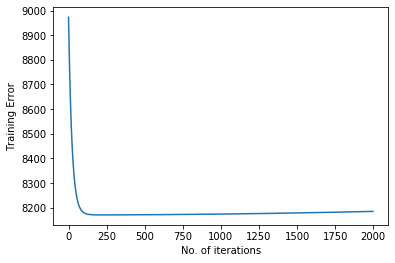

{'num_of_iteration': 2000, 'learning_rate': 0.1, 'regularization': 0.01}
[2269.866923824004]


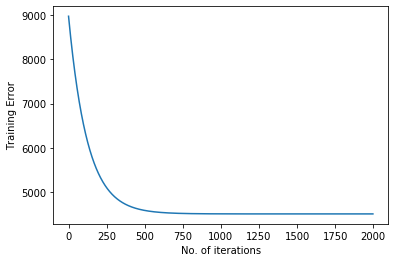

{'num_of_iteration': 2000, 'learning_rate': 0.1, 'regularization': 0.001}
[190.07289523144618]


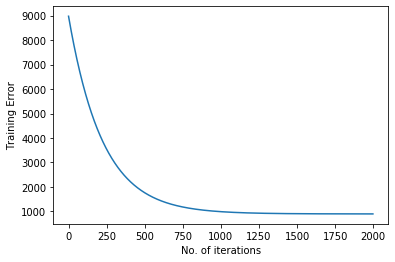

{'num_of_iteration': 2000, 'learning_rate': 0.9, 'regularization': 0.1}
[7297.754449017538]


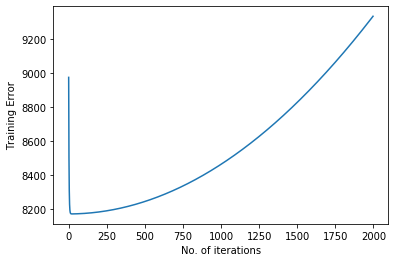

{'num_of_iteration': 2000, 'learning_rate': 0.9, 'regularization': 0.01}
[2267.6555224871017]


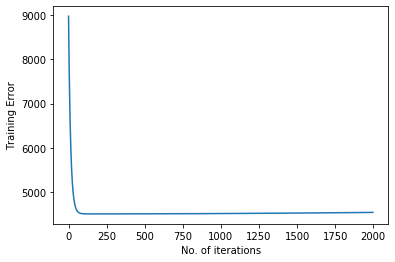

{'num_of_iteration': 2000, 'learning_rate': 0.9, 'regularization': 0.001}
[171.45699183095272]


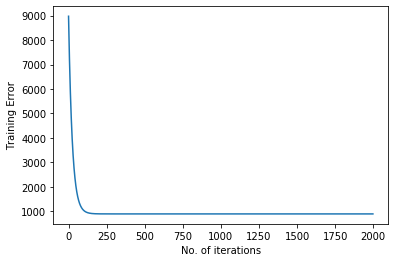

{'num_of_iteration': 5000, 'learning_rate': 0.1, 'regularization': 0.1}
[7301.929801199758]


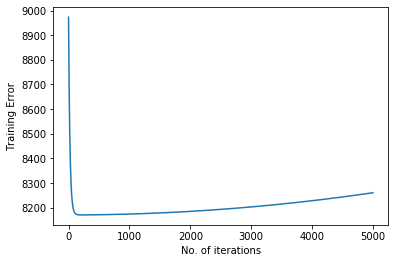

{'num_of_iteration': 5000, 'learning_rate': 0.1, 'regularization': 0.01}
[2268.3465484773]


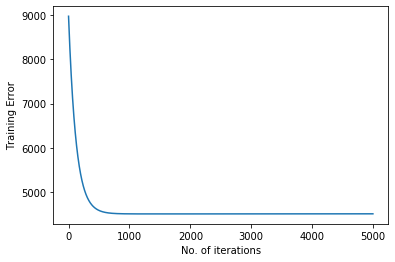

{'num_of_iteration': 5000, 'learning_rate': 0.1, 'regularization': 0.001}
[171.72867728327813]


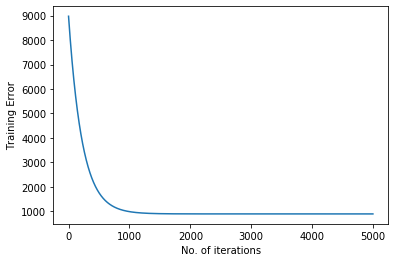

{'num_of_iteration': 5000, 'learning_rate': 0.9, 'regularization': 0.1}
[7289.089912524342]


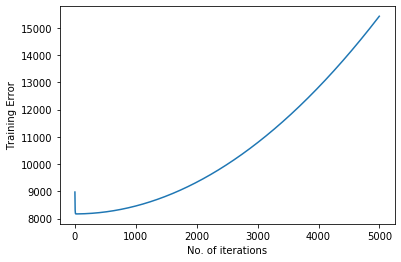

{'num_of_iteration': 5000, 'learning_rate': 0.9, 'regularization': 0.01}
[2266.221334615383]


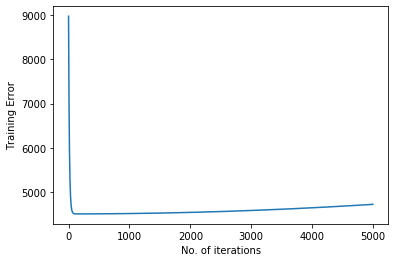

{'num_of_iteration': 5000, 'learning_rate': 0.9, 'regularization': 0.001}
[171.4300851201357]


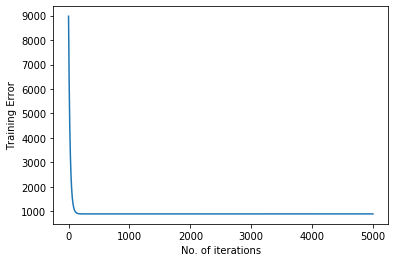

In [36]:
for g in grid:
    p={
    'num_of_iteration':g[0],
    'learning_rate':g[1],
    'regularization':g[2]
    }
    print(p)
    Weights,train_error,val_error=train_model(X_train,y_train,X_val,y_val,p)
    print(val_error)
    plt.plot(np.arange(len(train_error)),train_error)
    plt.xlabel("No. of iterations")
    plt.ylabel("Training Error")   
    plt.show()

In [37]:
# def grid_search(X_train,y_train,X_val,y_val,grid_param):
#     grid=list(itertools(product))

### Model Evaluation with R2 Score

In [38]:
final_param = {'num_of_iteration': 5000, 'learning_rate': 0.1, 'regularization': 0.001}
model_weights =  train_model(X_train,y_train,X_val,y_val,final_param) #Returns Weight, train_error and validation error


In [39]:
#Select weight only as
model_weights=model_weights[0]

In [40]:
# model_weights=model_weights[:4]
model_weights

array([[  6.0887768 ],
       [  1.69477483],
       [501.86136439],
       [489.08758163],
       [484.16963987]])

In [41]:
y_mean = np.mean(y_test)
h_test = np.matmul(X_test, model_weights)
n = X_test.shape[0]
k = X_test.shape[1] - 1
SST = np.sum(np.square(y_test - y_mean))
SSR = np.sum(np.square(h_test- y_mean))
SSE = SST - SSR
print(SSE)
R2 = 1 - (SSE/(n-k-1))/(SST/(n-1))
R2

24034552.25639555


0.817267297780813

In [42]:
X_test.shape,model_weights.shape,h_test.shape

((19741, 5), (5, 1), (19741, 1))

In [43]:
sse = np.sum(np.square(h_test - y_test))
sse

9720075.717789806

In [44]:
# #5000 and 0.1
# SSE= 1100482.76069282

# R2= 0.9912581329676198

# sse= 4699303.15028573